<a href="https://colab.research.google.com/github/ClaudiaGonzalezScanu/aprendiendo_python/blob/main/Clase_martes07_12_21_Reg_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar las librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Especificación de los datos y construcción de un DataFrame



In [ ]:
x = np.array([1,1,2,2.5,2,3,3,3.5,5,5,6,6,6.5,7,8,8,9,9,9.5,10,10,10.5,10.2,10.4])
y = np.array([2,3,2,2.8,3,4,5,3.8,6,4,7,5,7,7.5,10,8,9,8,9.5,8.5,9,9.2,9.8,10.2])
df = pd.DataFrame({"x":x, "y": y}, dtype = "float64")
df


,x,y
0,1.0,2.0
1,1.0,3.0
2,2.0,2.0
3,2.5,2.8
4,2.0,3.0
5,3.0,4.0
6,3.0,5.0
7,3.5,3.8
8,5.0,6.0
9,5.0,4.0


Visualización de los datos por medio de un gráfico de dispersión 

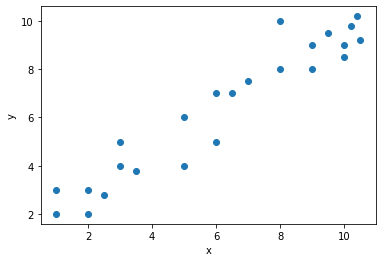

In [ ]:
plt.scatter(x, y);
plt.xlabel('x')
plt.ylabel('y')
plt.show()


**IMPLEMENTACIÓN DE UN MODELO DE REGRESIÓN LINEAL SIMPLE**
y=a*x+b

Separación de los datos en un conjunto de datos de entrenamiento y un conjunto de datos de prueba

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.x, df.y, test_size=0.3)


Se definen dataframes para cada uno de los conjuntos generados con la división de los datos

In [ ]:
df_x_train=pd.DataFrame({"x train":x_train}, dtype = "float64")
df_y_train=pd.DataFrame({"y train": y_train}, dtype = "float64")
df_x_test=pd.DataFrame({"x test":x_test}, dtype = "float64")
df_y_test=pd.DataFrame({"y test": y_test}, dtype = "float64")

Se define el algoritmo a utilizar que es el de LinearRegression (algoritmo de regresión lineal)

In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression()


Se entrena el modelo con los datos de entrenamiento

In [ ]:
lr.fit(df_x_train, df_y_train)

LinearRegression()

Se realiza una predicción utilizando los datos de prueba

In [ ]:
y_pred = lr.predict(df_x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- x test
Feature names seen at fit time, yet now missing:
- x train

  warnings.warn(message, FutureWarning)


Visualización de los datos y la recta de regresión lineal simple

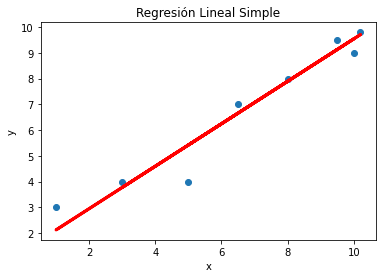

In [ ]:
plt.scatter(df_x_test, df_y_test)
plt.plot(df_x_test, y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Se obtienen los valores tanto de la pendiente como de la intersección de la recta, para obtener la ecuación del modelo

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()


DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[0.82474329]]
Valor de la intersección o coeficiente "b":
[1.29574137]



In [ ]:
print('La ecuación del modelo es igual a:')
print('y = ', lr.coef_, 'x ', lr.intercept_)


La ecuación del modelo es igual a:
y =  [[0.82474329]] x  [1.29574137]


**PRECISIÓN DEL MODELO DE REGRESIÓN**

Calculo de la precisión del modelo usando el estadístico R al cuadrado

In [ ]:
print('Precisión del Modelo:')
print("R2=",lr.score(df_y_test, y_pred))


Precisión del Modelo:
R2= 0.9093688845401173


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- y test
Feature names seen at fit time, yet now missing:
- x train

  warnings.warn(message, FutureWarning)


Calculo de la precisión del modelo usando el Error Cuadrático Medio (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(df_y_test, y_pred)
print("MSE=",MSE)

MSE= 0.4262939909914282


Calculo de la precisión del modelo usando la Raíz del Error Cuadrático Medio (RMSE)

In [ ]:
from math import sqrt
MSE=mean_squared_error(df_y_test, y_pred)
RMSE=sqrt(MSE)
print("RMSE=",RMSE)

RMSE= 0.6529119320332782


Teniendo en cuenta las medidas correspondientes  al R2 y RMSE se puede afirmar que el modelo de regresión lineal ajusta adecuadamente los datos.

In [ ]:
print("y_mean=",np.mean(y))


y_mean= 6.3875


Se puede ver que el valor RMSE (0.67), es prácticamente igual al 10% del valor de la media que es de 6.05. Esto significa que nuestro algoritmo es preciso, además viendo R2, podemos afirmar que el modelo puede hacer predicciones razonablemente buenas.

**IMPLEMENTACIÓN DE UN MODELO DE REGRESIÓN LINEAL MÚLTIPLE**
y=a1*x1 + a2*x2 + b

In [ ]:
x1 = np.array([1,1,2,2,2.5,3,3,3.5,4,5,5,6,6,6.5,7,7,8,8,9,9,9.5,10,10,10])
x2 = np.array([1,1.5,2.5,2.8,3,3.2,3.5,3,4.5,5,6,5.5,6.2,7,6.5,7.2,8,8.2,8.5,9.3,9,9,9.4,9.8])
y = np.array([1.5,2,5,4.5,5.7,6,6.8,7,9,9.5,10.8,11,12.5,14,13.2,13.5,15,15.7,20,18,19,18.7,20,20.5])
df = pd.DataFrame({"x1":x1, "x2": x2, "y":y}, dtype = "float64")
df

,x1,x2,y
0,1.0,1.0,1.5
1,1.0,1.5,2.0
2,2.0,2.5,5.0
3,2.0,2.8,4.5
4,2.5,3.0,5.7
5,3.0,3.2,6.0
6,3.0,3.5,6.8
7,3.5,3.0,7.0
8,4.0,4.5,9.0
9,5.0,5.0,9.5


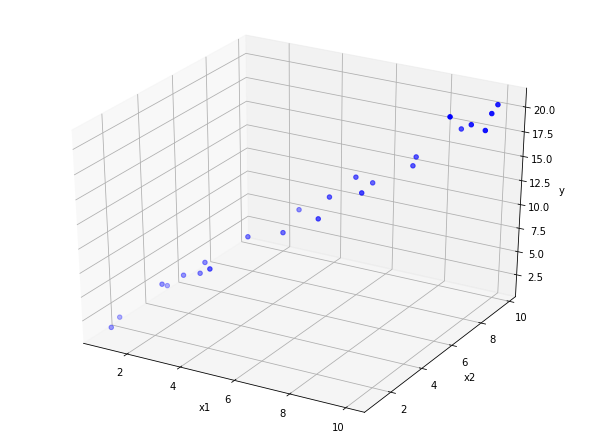

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))   
ax = Axes3D(fig)

x1 = df["x1"]                            
x2 = df["x2"]                        
y = df["y"] 

ax.scatter(x1, x2, y, c='b')
ax.set_xlabel('x1')       
ax.set_ylabel('x2')       
ax.set_zlabel('y'); 

In [ ]:
X_multiple=pd.DataFrame({"x1":x1, "x2": x2}, dtype = "float64")
y_multiple=pd.DataFrame({"y":y}, dtype = "float64")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.3)

In [ ]:
lr_multiple = linear_model.LinearRegression()

In [ ]:
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [ ]:
Y_pred_multiple = lr_multiple.predict(X_test)

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[[1.13142321 0.91690977]]
Valor de la intersección o coeficiente "b":
[-0.23803397]


In [ ]:
print('Precisión del modelo:')
print(lr_multiple.score(X_train, y_train))

Precisión del modelo:
0.9856295983101612
